In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
class KMeans:
    def __init__(self, filename, k, iterations=20):
        self.k = k
        self.iterations = iterations
        self.df = pd.read_csv(filename, header=None, sep="\s+")
        self.class_labels = self.df.iloc[:, -1]
        self.df = self.df.drop(self.df.columns[-1], axis=1)
        self.no_features = self.df.shape[1]
        self.centroids = self.initialize_centroids()
        self.sse = self.run_kmeans()

    def initialize_centroids(self):
        # Random partition method for initializing centroids
        # Create k custer IDs
        cluster_ids = [i for i in range(self.k)]
        # Assign each row to a random cluster ID
        self.df['cluster_id'] = np.random.choice(cluster_ids, size=len(self.df))
        # Calculate the mean of each cluster
        centroids = self.df.groupby('cluster_id').mean()
        # Convert the centroids to a numpy array
        centroids = centroids.values
        # Return the centroids
        return centroids

    def run_kmeans(self):
        # Get the list of centroid column names
        centroid_cols = ['distance_from_{}'.format(j) for j in range(self.k)]
        # Iterate through the number of iterations
        for _ in range(self.iterations):
            # Calculate the distance between each point and each centroid
            for j in range(len(self.centroids)):
                # Calculate the distance between each point and the centroid
                # self.df['distance_from_{}'.format(j)] = np.sqrt((self.df.iloc[:, :no_features] - self.centroids[j])**2).sum(axis=1)
                self.df['distance_from_{}'.format(j)] = np.sqrt(((self.df.iloc[:, :self.no_features] - self.centroids[j])**2).sum(axis=1))

            # Assign the cluster ID to the closest centroid
            self.df['closest'] = self.df.loc[:, centroid_cols].idxmin(axis=1)
            # Remove the 'distance_from_' prefix
            self.df['closest'] = self.df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
            # Update the cluster ID
            self.df['cluster_id'] = self.df['closest']
            # Calculate the new centroids by grouping by the cluster ID and taking the mean from columns 0-16
            self.centroids = self.df.groupby('cluster_id').mean().iloc[:, :self.no_features].values

        # Get the sum of the total distance
        self.df['sse'] = self.df.loc[:, centroid_cols].min(axis=1)

        return self.df['sse'].sum()

In [3]:
def run(file, start_k = 2, end_k = 10, iterations=20):
    x_axis = [i for i in range(start_k, end_k + 1)]
    y_axis = []

    for i in range(start_k, end_k + 1):
        kmeans = KMeans(file, i)
        y_axis.append(kmeans.sse)
        print(f'For k = {i} After 20 iterations: SSE error = {kmeans.sse:.4f}')

    # create a new figure and axis object
    fig, ax = plt.subplots()

    # plot the line graph
    ax.plot(x_axis, y_axis)

    # add labels and title
    ax.set_xlabel('K')
    ax.set_ylabel('SSE')
    ax.set_title('KMeans SSE vs K')


    # display the plot
    plt.show()

Pendigits Dataset
For k = 2 After 20 iterations: SSE error = 792711.1530
For k = 3 After 20 iterations: SSE error = 711857.8163
For k = 4 After 20 iterations: SSE error = 636815.2687
For k = 5 After 20 iterations: SSE error = 597520.9462
For k = 6 After 20 iterations: SSE error = 567221.5340
For k = 7 After 20 iterations: SSE error = 549680.2654
For k = 8 After 20 iterations: SSE error = 507520.7254
For k = 9 After 20 iterations: SSE error = 500163.3981
For k = 10 After 20 iterations: SSE error = 496726.8891


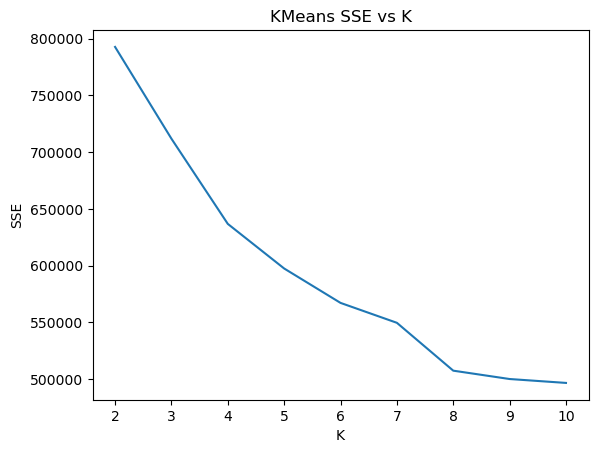

In [8]:
print("Pendigits Dataset")
run("UCI_datasets/pendigits_training.txt")


Satellite Dataset
For k = 2 After 20 iterations: SSE error = 334778.8560
For k = 3 After 20 iterations: SSE error = 260000.9820
For k = 4 After 20 iterations: SSE error = 235291.9672
For k = 5 After 20 iterations: SSE error = 222035.3533
For k = 6 After 20 iterations: SSE error = 212044.9944
For k = 7 After 20 iterations: SSE error = 207243.8485
For k = 8 After 20 iterations: SSE error = 189117.6717
For k = 9 After 20 iterations: SSE error = 181510.4307
For k = 10 After 20 iterations: SSE error = 176472.4321


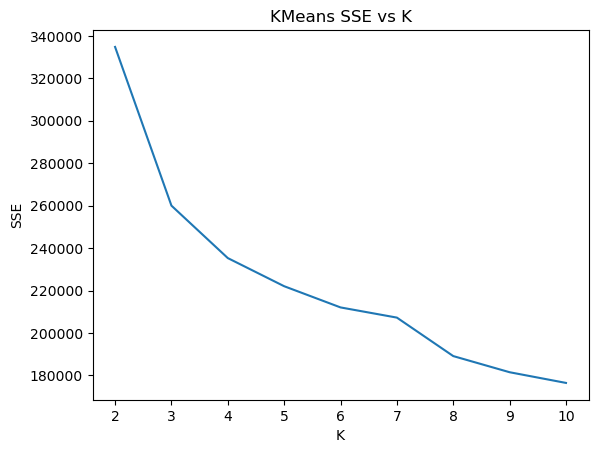

In [9]:
print("Satellite Dataset")
run("UCI_datasets/satellite_training.txt")


Yeast Dataset
For k = 2 After 20 iterations: SSE error = 226.6286
For k = 3 After 20 iterations: SSE error = 205.5364
For k = 4 After 20 iterations: SSE error = 193.2814
For k = 5 After 20 iterations: SSE error = 180.7955
For k = 6 After 20 iterations: SSE error = 175.0846
For k = 7 After 20 iterations: SSE error = 171.4580
For k = 8 After 20 iterations: SSE error = 167.7433
For k = 9 After 20 iterations: SSE error = 162.0418
For k = 10 After 20 iterations: SSE error = 156.7203


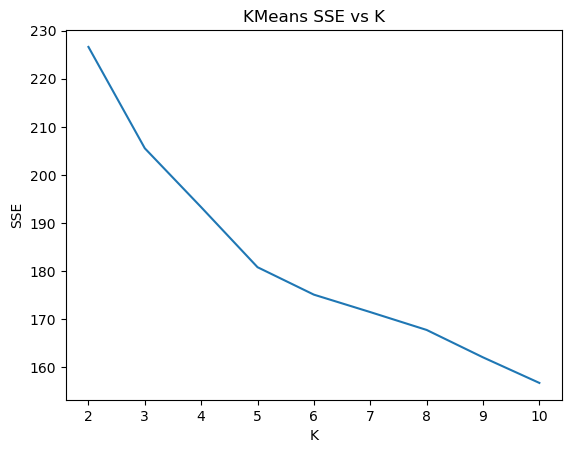

In [7]:
print("Yeast Dataset")
run("UCI_datasets/yeast_training.txt")